# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
def get_current_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    r = requests.get(url, params = payload)
    
    if r.status_code == 200:
        print(f"Processing Record {len(all_cities)} of Set 1 | ")
        return r.json()
    else:
        print("City not found. Skipping...")
        return None

In [58]:
var1 = get_current_weather("London", api_key)

Processing Record 86 of Set 1 | 


In [59]:
all_cities = []
print('''
Beginning Data Retrieval
--------------------------------''')
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)


Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1 | 
Processing Record 1 of Set 1 | 
Processing Record 2 of Set 1 | 
Processing Record 3 of Set 1 | 
Processing Record 4 of Set 1 | 
Processing Record 5 of Set 1 | 
Processing Record 6 of Set 1 | 
Processing Record 7 of Set 1 | 
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | 
Processing Record 9 of Set 1 | 
Processing Record 10 of Set 1 | 
Processing Record 11 of Set 1 | 
Processing Record 12 of Set 1 | 
Processing Record 13 of Set 1 | 
Processing Record 14 of Set 1 | 
Processing Record 15 of Set 1 | 
City not found. Skipping...
Processing Record 16 of Set 1 | 
City not found. Skipping...
Processing Record 17 of Set 1 | 
Processing Record 18 of Set 1 | 
Processing Record 19 of Set 1 | 
Processing Record 20 of Set 1 | 
Processing Record 21 of Set 1 | 
Processing Record 22 of Set 1 | 
Processing Record 23 of Set 1 | 
Processing Record 24 of Set 1 | 
Processing Rec

KeyboardInterrupt: 

In [6]:
all_cities[0]

{'coord': {'lon': -161.76, 'lat': 60.79},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 245.96,
  'feels_like': 234.2,
  'temp_min': 245.15,
  'temp_max': 247.15,
  'pressure': 1006,
  'humidity': 68},
 'visibility': 16093,
 'wind': {'speed': 11.3, 'deg': 10, 'gust': 14.9},
 'clouds': {'all': 1},
 'dt': 1577496000,
 'sys': {'type': 1,
  'id': 7640,
  'country': 'US',
  'sunrise': 1577476710,
  'sunset': 1577497051},
 'timezone': -32400,
 'id': 5880568,
 'name': 'Bethel',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
df = pd.DataFrame([{
    "City": d["name"],
    "Country": d["sys"].get('country', ''),
    "Date": d["dt"],
    "Latitude": d["coord"].get('lat', ''),
    "Longitude": d["coord"].get('lon', ''),
    "Temp": d["main"]["temp"] - 273.15,
    "Temp Min": d["main"]["temp_min"],
    "Temp Max": d["main"]["temp_max"],
    "Pressure": d["main"]["pressure"],
    "Humidity": d["main"]["humidity"],
    "Clouds": d["clouds"].get("all", ""),
    "Wind Speed": d["wind"].get("speed", "")
} for d in all_cities])

In [21]:
df['Max F'] = (df["Temp Max"] - 273.15) * (9/5) + 32

In [22]:
df.head()

,City,Country,Date,Latitude,Longitude,Temp,Temp Min,Temp Max,Pressure,Humidity,Clouds,Wind Speed,Max F
0,Bethel,US,1577496000,60.79,-161.76,-27.19,245.15,247.15,1006,68,1,11.30,-14.800
1,Atuona,PF,1577496000,-9.80,-139.03,27.41,300.56,300.56,1010,71,66,7.92,81.338
2,Hofn,IS,1577496000,64.25,-15.21,7.99,281.14,281.14,995,82,47,17.10,46.382
3,Castro,CL,1577496000,-42.48,-73.76,13.00,286.15,286.15,1016,87,40,1.50,55.400
4,Longyearbyen,NO,1577496000,78.22,15.63,-5.00,268.15,268.15,1007,73,75,2.60,23.000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

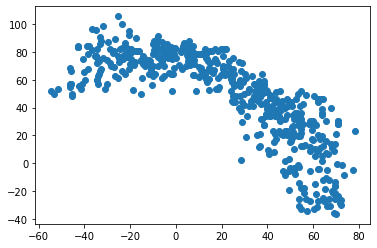

In [25]:
plt.scatter(df["Latitude"], df["Max F"])

#### Latitude vs. Humidity Plot

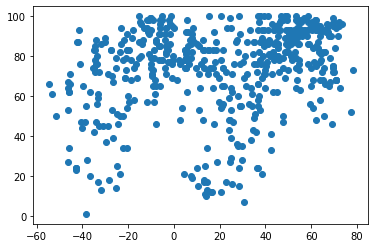

In [14]:
plt.scatter(df["Latitude"], df["Humidity"])

#### Latitude vs. Cloudiness Plot

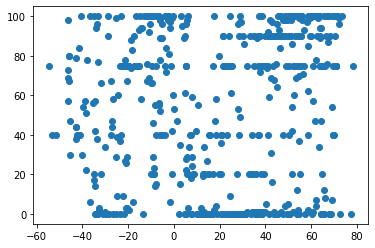

In [26]:
plt.scatter(df["Latitude"], df["Clouds"])

#### Latitude vs. Wind Speed Plot

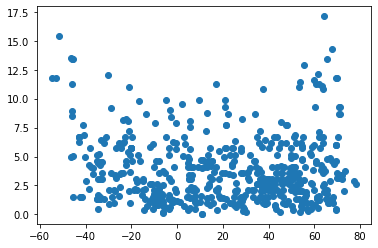

In [27]:
plt.scatter(df["Latitude"], df["Wind Speed"])